In [ ]:
!pip install scipy

In [1]:
import numpy as np
import scipy.optimize as opt #Scipy is library for scientific functions, we are importing an optimizer class from this
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
np.exp(2)

7.38905609893065

In [5]:
#Also known as logistic function it is the basis of Logistic Regression`
def sigmoid(Z):
    return 1/(1+np.exp(-Z)) #e`

In [6]:
#The cost function for logistic regression is called Binary Crossentropy loss
def cost(theta,X,y): #BCE
    pred = sigmoid(np.dot(X,theta.T)) #yhat
    mcost = -y*np.log(pred) - (1-y)*np.log(1-pred)
    #print(mcost)
    return mcost.mean()

In [4]:
(np.array([0,1,2,3,4,5])>3)*1

array([0, 0, 0, 0, 1, 1])

In [7]:
#The predict function for predicting class of a new point
def predict(theta,X):
    m,n = X.shape
    p = np.zeros(shape=(m,1)) #PLACEHOLDER
    h = sigmoid(X.dot(theta.T)) #=sigmoid(np.dot(X,theta.T))
    p = 1*(h>=0.5)
    return p

In [5]:
#Loading Breast Cancer Dataset
data = pd.read_csv('Breast-Cancer.csv',na_values=['?'])
data.drop(['id'],axis=1,inplace=True)
data.dropna(inplace=True)
#data.head()
data.head()

,x1,x2,x3,x4,x5,x6,x7,x8,x9,label
0,5,1,1,1,2,1.0,3,1,1,2
1,5,4,4,5,7,10.0,3,2,1,2
2,3,1,1,1,2,2.0,3,1,1,2
3,6,8,8,1,3,4.0,3,7,1,2
4,4,1,1,3,2,1.0,3,1,1,2


In [9]:
#Segregating points into Features (X) and labels (Y)
X = np.array(data.values.tolist())[:,:-1] #Taking all features
Y_n = np.array(data.values.tolist())[:,-1]

In [10]:
#encoding the names of classes as 0s and 1s
num_y = []
for i in Y_n.tolist():
    if i == 2:
        num_y.append(0)
    else:
        num_y.append(1)
Y = np.array(num_y)

In [11]:
X=X.astype(np.float64)

In [12]:
Y

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,

In [14]:
XX = np.append(np.ones((X.shape[0],1)),X,axis=1)
m,n = XX.shape
XX.shape

(683, 10)

In [32]:
#initializing weight matrix theta (for more info on weight matrix check out multilinear and polynomial regression)
theta = 0.1*np.random.randn(n)
print(theta)

[-0.04085915 -0.03092598  0.0561644   0.05514831 -0.1709066  -0.158104
 -0.0039383  -0.14853478  0.21468228 -0.00123357]


In [33]:
#Training phase where we use gradient descent optimiation to find values for the weight matrix
theta = opt.fmin_bfgs(cost,theta,args=(XX,Y))

Optimization terminated successfully.
         Current function value: 0.075321
         Iterations: 56
         Function evaluations: 696
         Gradient evaluations: 58


In [35]:
theta

array([-1.01039325e+01,  5.35023652e-01, -6.28959793e-03,  3.22703909e-01,
        3.30660603e-01,  9.66398864e-02,  3.83022907e-01,  4.47211577e-01,
        2.13010996e-01,  5.34806219e-01])

In [36]:
#points for testing (Taken in same form as matrix in multilinear regression)
p = predict(theta,XX[:,:])
#print('Predicted Classes:',p)
print('Accuracy: %f' % 
      ((Y[np.where(p==Y[:])].size/
        float(Y[:].size))*100.0)) #Training accuracy

Accuracy: 96.925329


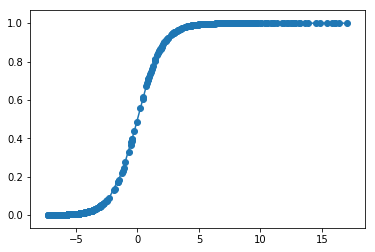

In [37]:
#Plotting the sigmoid for all the training points
plt.plot(np.arange(min(np.dot(XX,theta.T)),max(np.dot(XX,theta.T))),sigmoid(np.arange(min(np.dot(XX,theta.T)),max(np.dot(XX,theta.T)))))
plt.scatter(np.dot(XX,theta.T) , sigmoid(np.dot(XX,theta.T)))

In [6]:
x = np.array([[1,2,3],
              [3,4,5],
              [5,6,7]])

In [10]:
x[:,-1]

array([3, 5, 7])

In [ ]:
 0  1  2  3  4  5
[10,11,12,13,14,15]
 -6    -4 -3  -2  -1